In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('clean_smartphones.csv')

In [3]:
df.head()

,brand,processor_name,processor_cores,processor_speed,os,ram,storage,battery_capacity,battery_power,DualSim,...,wifi,ngc,irblaster,display_size,display_resolution,rear_camera,front_camera,memory_card_supported,rating,price
0,OnePlus,Snapdragon,8.0,3.2,Android v13,12 GB RAM,256 GB inbuilt,5000 mAh,100W,1,...,1,1,0,6.70,1440x3216,50.0,16.0,0.0,89.0,54999
1,OnePlus,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,33W,1,...,1,0,0,6.59,1080x2412,64.0,16.0,1.0,81.0,19989
2,Samsung,Exynos,8.0,2.4,Android v13,4 GB RAM,64 GB inbuilt,5000 mAh,15W,1,...,1,0,0,6.60,1080x2408,50.0,13.0,1.0,75.0,16499
3,Motorola,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,NaN,1,...,1,0,0,6.55,1080x2400,50.0,16.0,1.0,81.0,14999
4,Realme,Dimensity,8.0,2.6,Android v13,6 GB RAM,128 GB inbuilt,5000 mAh,67W,1,...,1,0,0,6.70,1080x2412,108.0,16.0,0.0,82.0,24999


In [4]:
df.shape

(1020, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  1020 non-null   object 
 1   processor_name         967 non-null    object 
 2   processor_cores        980 non-null    float64
 3   processor_speed        931 non-null    object 
 4   os                     741 non-null    object 
 5   ram                    993 non-null    object 
 6   storage                993 non-null    object 
 7   battery_capacity       987 non-null    object 
 8   battery_power          769 non-null    object 
 9   DualSim                1020 non-null   int64  
 10  Volte                  1020 non-null   int64  
 11  is_5G                  1020 non-null   int64  
 12  is_Vo5G                1020 non-null   int64  
 13  wifi                   1020 non-null   int64  
 14  ngc                    1020 non-null   int64  
 15  irbl

In [6]:
# remove duplicates 
df.duplicated().sum()

2

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(1018, 23)

In [9]:
(df.isnull().sum()/1018)*100

brand                     0.000000
processor_name            5.206287
processor_cores           3.929273
processor_speed           8.742633
os                       27.308448
ram                       2.652259
storage                   2.652259
battery_capacity          3.241650
battery_power            24.656189
DualSim                   0.000000
Volte                     0.000000
is_5G                     0.000000
is_Vo5G                   0.000000
wifi                      0.000000
ngc                       0.000000
irblaster                 0.000000
display_size              3.241650
display_resolution        3.241650
rear_camera               6.483301
front_camera              7.563851
memory_card_supported    27.308448
rating                   13.850688
price                     0.000000
dtype: float64

In [10]:
df.head()

,brand,processor_name,processor_cores,processor_speed,os,ram,storage,battery_capacity,battery_power,DualSim,...,wifi,ngc,irblaster,display_size,display_resolution,rear_camera,front_camera,memory_card_supported,rating,price
0,OnePlus,Snapdragon,8.0,3.2,Android v13,12 GB RAM,256 GB inbuilt,5000 mAh,100W,1,...,1,1,0,6.70,1440x3216,50.0,16.0,0.0,89.0,54999
1,OnePlus,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,33W,1,...,1,0,0,6.59,1080x2412,64.0,16.0,1.0,81.0,19989
2,Samsung,Exynos,8.0,2.4,Android v13,4 GB RAM,64 GB inbuilt,5000 mAh,15W,1,...,1,0,0,6.60,1080x2408,50.0,13.0,1.0,75.0,16499
3,Motorola,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,NaN,1,...,1,0,0,6.55,1080x2400,50.0,16.0,1.0,81.0,14999
4,Realme,Dimensity,8.0,2.6,Android v13,6 GB RAM,128 GB inbuilt,5000 mAh,67W,1,...,1,0,0,6.70,1080x2412,108.0,16.0,0.0,82.0,24999


### Target column (Price) :

<Axes: xlabel='price'>

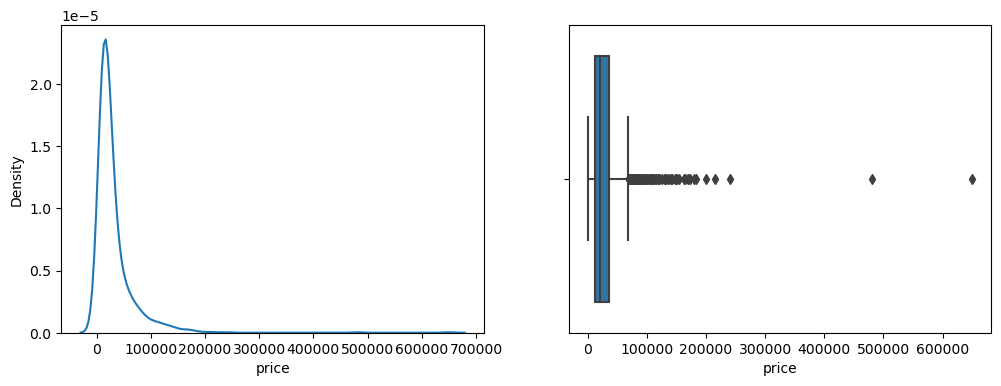

In [11]:
plt.figure(figsize=(12,4))

plt.subplot(121)
sns.kdeplot(x=df['price'])

plt.subplot(122)
sns.boxplot(x=df['price'])

In [12]:
df[(df['price']>200000) & (df['price']<300000)].shape

(2, 23)

##### Price Observation
1. Price > 7,00,000 --- 0
2. Price > 6,00,000 --- 1(vertu)
3. Price > 5,00,000 --- 0
4. Price > 4,00,000 --- 1(xiaomi)
5. Price > 3,00,000 --- 0
6. Price > 2,00,000 --- 2(huawei)
7. Price > 1,50,000 --- 9
8. Price > 1,00,000 --- 35

In [13]:
# remove outliers (whose 'Price' > 2,00,000)
df = df.drop(df[df['price']>200000].index,axis=0)

In [14]:
df.shape

(1014, 23)

### 1. Brand :

In [15]:
df.head()

,brand,processor_name,processor_cores,processor_speed,os,ram,storage,battery_capacity,battery_power,DualSim,...,wifi,ngc,irblaster,display_size,display_resolution,rear_camera,front_camera,memory_card_supported,rating,price
0,OnePlus,Snapdragon,8.0,3.2,Android v13,12 GB RAM,256 GB inbuilt,5000 mAh,100W,1,...,1,1,0,6.70,1440x3216,50.0,16.0,0.0,89.0,54999
1,OnePlus,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,33W,1,...,1,0,0,6.59,1080x2412,64.0,16.0,1.0,81.0,19989
2,Samsung,Exynos,8.0,2.4,Android v13,4 GB RAM,64 GB inbuilt,5000 mAh,15W,1,...,1,0,0,6.60,1080x2408,50.0,13.0,1.0,75.0,16499
3,Motorola,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,NaN,1,...,1,0,0,6.55,1080x2400,50.0,16.0,1.0,81.0,14999
4,Realme,Dimensity,8.0,2.6,Android v13,6 GB RAM,128 GB inbuilt,5000 mAh,67W,1,...,1,0,0,6.70,1080x2412,108.0,16.0,0.0,82.0,24999


In [16]:
len(df['brand'].unique())

52

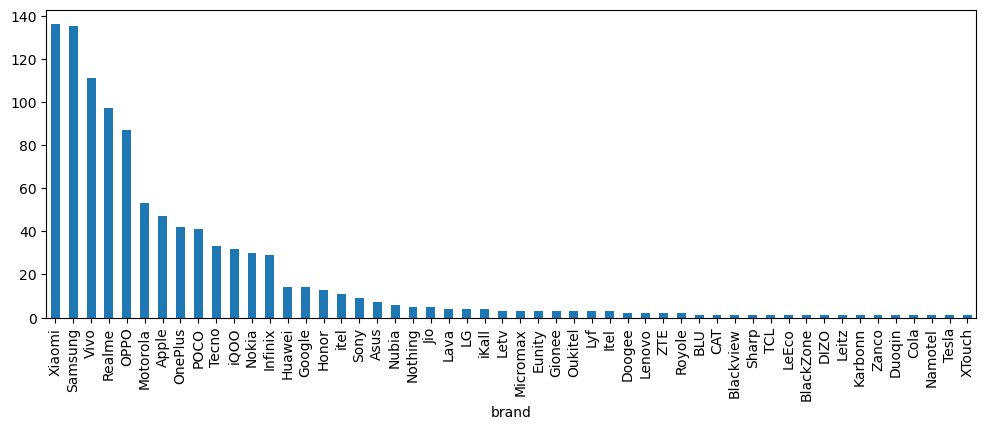

In [17]:
plt.figure(figsize=(12,4))
df['brand'].value_counts().plot(kind='bar')
plt.show()

In [18]:
# 'OTHERS' category for smartphone 
main=['Xiaomi', 'Samsung', 'Vivo', 'Realme', 'OPPO', 'Motorola', 'Apple',
       'OnePlus', 'POCO', 'Tecno', 'iQOO', 'Nokia', 'Infinix','Huawei']
df['brand'] = df['brand'].apply(lambda x:x if x in main else 'Others')

In [19]:
df['brand'].unique()

array(['OnePlus', 'Samsung', 'Motorola', 'Realme', 'Apple', 'Xiaomi',
       'Others', 'OPPO', 'Vivo', 'POCO', 'iQOO', 'Tecno', 'Infinix',
       'Nokia', 'Huawei'], dtype=object)

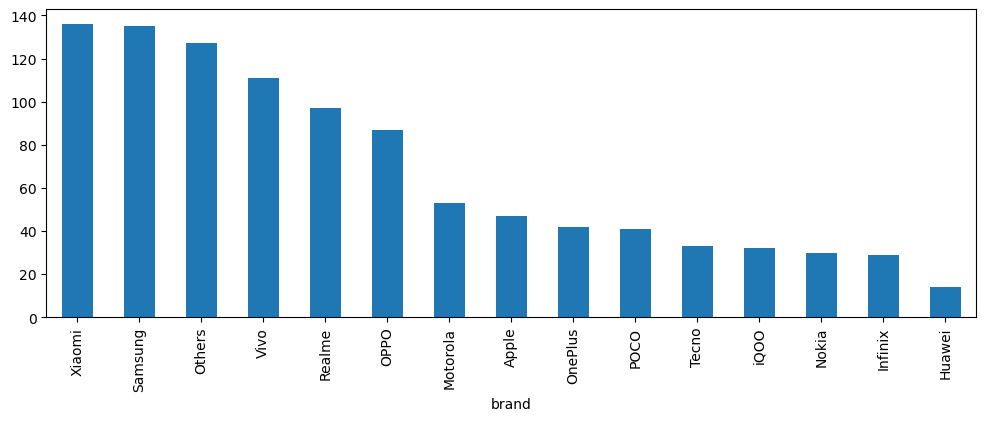

In [20]:
plt.figure(figsize=(12,4))
df['brand'].value_counts().plot(kind='bar')
plt.show()

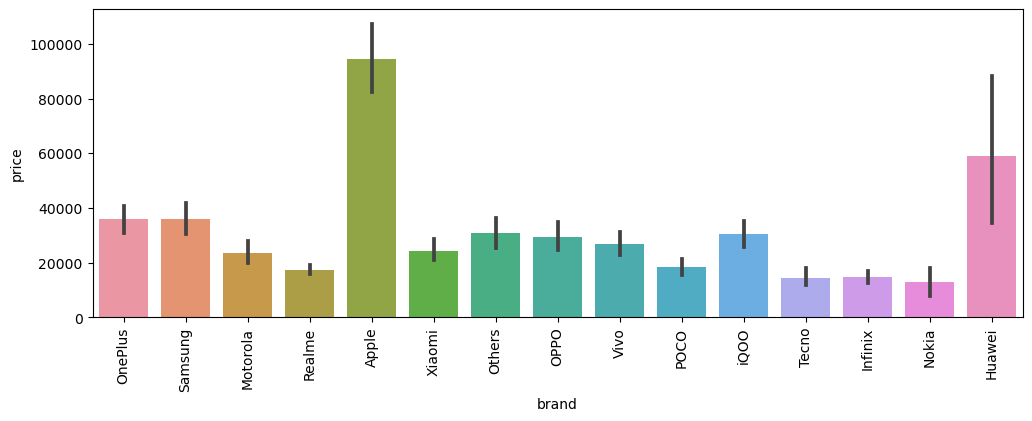

In [21]:
# 'price' and 'brand'
plt.figure(figsize=(12,4))
sns.barplot(x=df.brand, y=df.price)
plt.xticks(rotation='vertical')
plt.show()

### 2. Processor :

In [22]:
# missing values of processor columns
print(df['processor_name'].isnull().sum())
print(df['processor_cores'].isnull().sum())
print(df['processor_speed'].isnull().sum())

53
40
89


#### A. processor_name

processor_name
Snapdragon    414
Helio         202
Dimensity     175
Exynos         50
Bionic         45
Unisoc         35
Tiger          24
Google          9
Kirin           6
Fusion          1
Name: count, dtype: int64


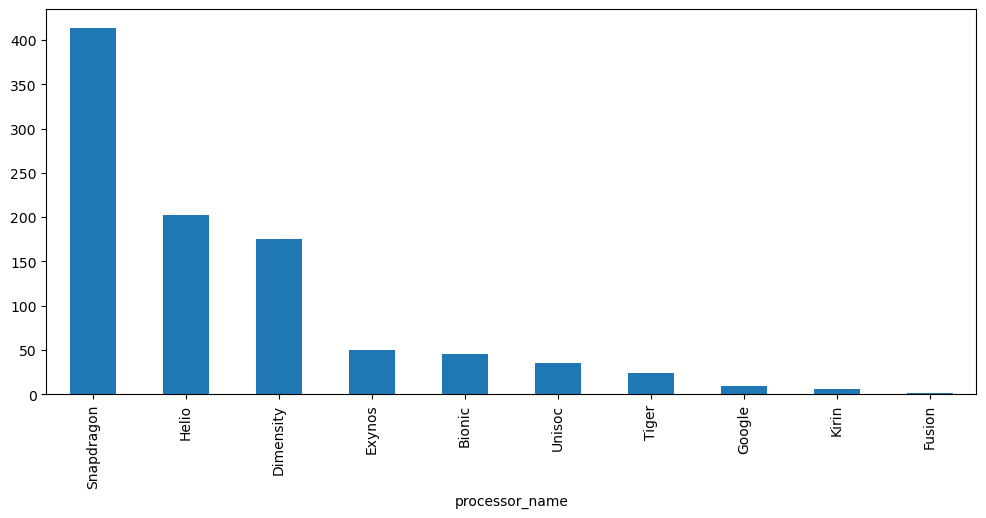

In [23]:
plt.figure(figsize=(12,5))
print(df['processor_name'].value_counts())
df['processor_name'].value_counts().plot(kind='bar')
plt.show()

In [24]:
# since 'Apple' brand have 'Bionic' processors
df['processor_name'] = df['processor_name'].str.replace('Fusion','Bionic')

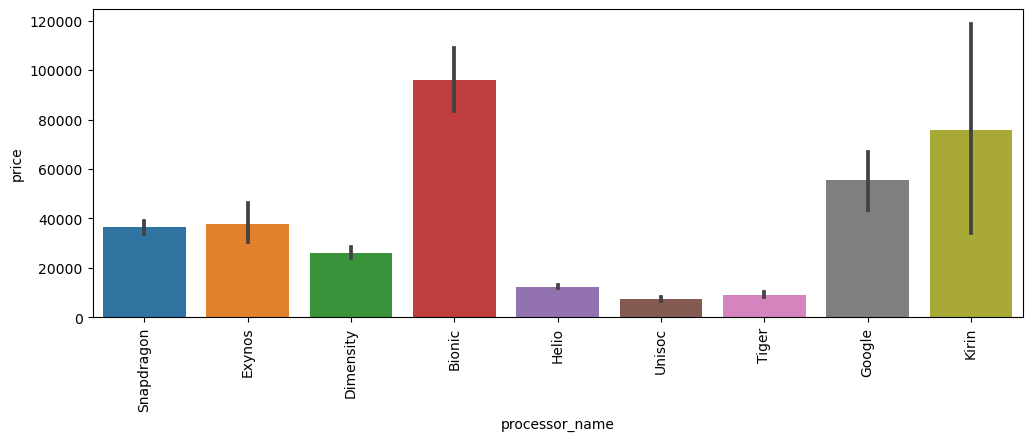

In [25]:
# price and processor_name
# 'price' and 'brand'
plt.figure(figsize=(12,4))
sns.barplot(x=df.processor_name, y=df.price)
plt.xticks(rotation='vertical')
plt.show()

In [26]:
# brands have missing processor_names
df[df['processor_name'].isnull()==True]['brand'].unique()

array(['Others', 'Samsung', 'Nokia', 'Motorola', 'Apple', 'Tecno',
       'Huawei'], dtype=object)

In [27]:
df.groupby(by=['brand','processor_name']).size().reset_index()

,brand,processor_name,0
0,Apple,Bionic,46
1,Huawei,Kirin,6
2,Huawei,Snapdragon,7
3,Infinix,Dimensity,6
4,Infinix,Helio,20
5,Infinix,Tiger,3
6,Motorola,Dimensity,2
7,Motorola,Helio,11
8,Motorola,Snapdragon,37
9,Motorola,Tiger,2


##### Processor_name Observation

1. Apple ---- 'Bionic'
2. Samsung ---- 'Exynos'
3. Nokia ---- 'Snapdragon'
4. Motorola ---- 'Snapdragon'
5. Tecno ---- 'Helio'
6. Huawei ---- 'Kirin'

In [28]:
# processor_name missing values Imputation
df['processor_name'] = df['processor_name'].fillna('None')

In [29]:
import warnings
warnings.filterwarnings('ignore')
for i,word in enumerate(df['processor_name']):
    if word=='None':
        if df['brand'].iloc[i]=='Apple':
            df['processor_name'].iloc[i]='Bionic'
        elif df['brand'].iloc[i]=='Samsung':
            df['processor_name'].iloc[i]='Exynos'
        elif df['brand'].iloc[i] in ['Nokia', 'Motorola','Others']:
            df['processor_name'].iloc[i]='Snapdragon'
        elif df['brand'].iloc[i]=='Tecno':
            df['processor_name'].iloc[i]='Helio'
        elif df['brand'].iloc[i]=='Huawei':
            df['processor_name'].iloc[i]='Kirin'

processor_name
Snapdragon    449
Helio         203
Dimensity     175
Exynos         65
Bionic         47
Unisoc         35
Tiger          24
Google          9
Kirin           7
Name: count, dtype: int64


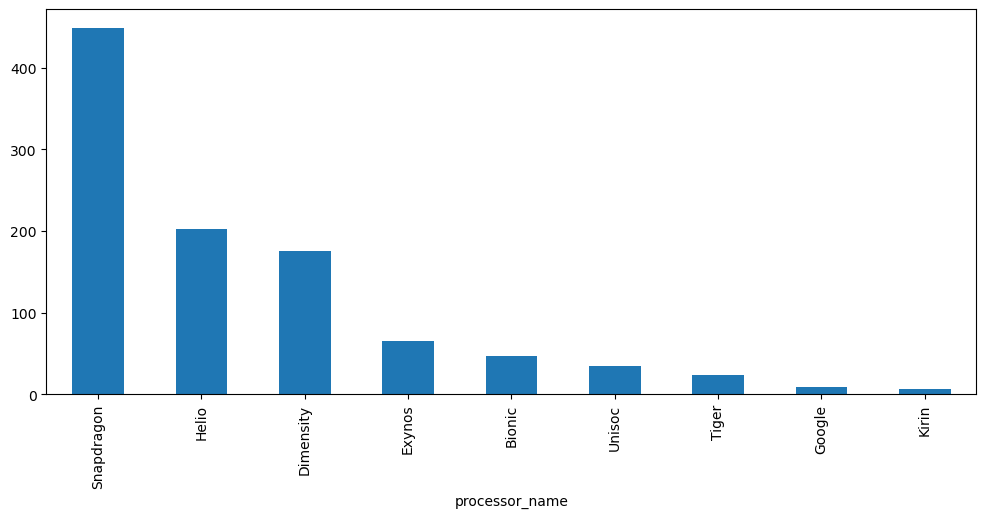

In [30]:
plt.figure(figsize=(12,5))
print(df['processor_name'].value_counts())
df['processor_name'].value_counts().plot(kind='bar')
plt.show()

In [31]:
df.groupby(by=['brand','processor_name']).size().reset_index()[0].sum()

1014

#### B. processor_cores

processor_cores
8.0    893
6.0     39
4.0     39
2.0      2
1.0      1
Name: count, dtype: int64


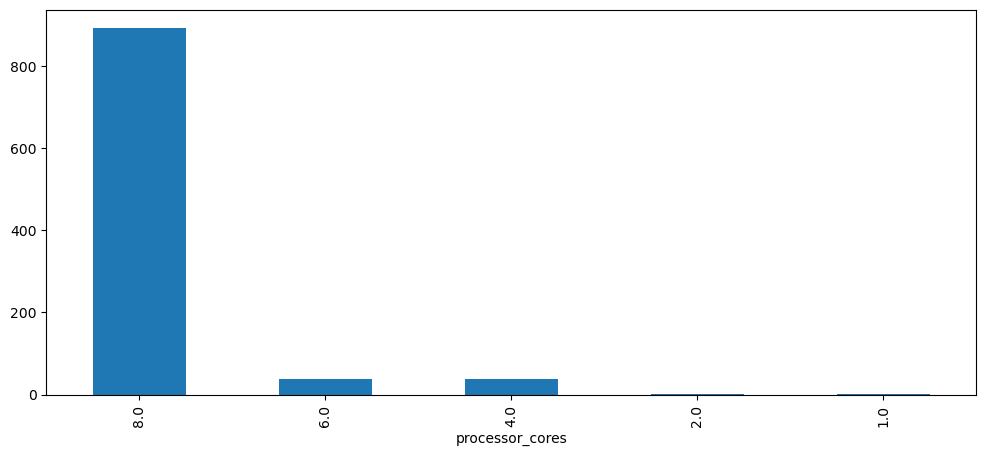

In [32]:
plt.figure(figsize=(12,5))
print(df['processor_cores'].value_counts())
df['processor_cores'].value_counts().plot(kind='bar')
plt.show()

In [33]:
df[df['processor_cores']==6.0]['brand'].unique()

array(['Apple'], dtype=object)

In [34]:
# brands whose processor_cores are missing
df[df['processor_cores'].isnull()==True]['brand'].value_counts()

brand
Nokia       15
Others      14
Apple        6
Samsung      3
Motorola     1
Xiaomi       1
Name: count, dtype: int64

In [35]:
# processor_cores missing values imputation
df['processor_cores'] = df['processor_cores'].fillna(8.0)

#### C. processor_speed:

In [37]:
df['processor_speed'].info()

<class 'pandas.core.series.Series'>
Index: 1014 entries, 0 to 1019
Series name: processor_speed
Non-Null Count  Dtype 
--------------  ----- 
925 non-null    object
dtypes: object(1)
memory usage: 15.8+ KB


In [45]:
df['processor_speed'] = df['processor_speed'].str.replace('\u2009','')

In [59]:
# finding the mean by which we can fill the null values of 'processor_speed'
mean_processor_speed = round(df[df['processor_speed'].isnull()==False]['processor_speed'].str.replace(' ','').astype(np.float64).mean(),1)

# filling null values of processor_speed
df['processor_speed'] = df['processor_speed'].fillna(mean_processor_speed).astype(np.float64)

In [61]:
# missing values of processor columns NOW
print(df['processor_name'].isnull().sum())
print(df['processor_cores'].isnull().sum())
print(df['processor_speed'].isnull().sum())

0
0
0


In [62]:
df.columns

Index(['brand', 'processor_name', 'processor_cores', 'processor_speed', 'os',
       'ram', 'storage', 'battery_capacity', 'battery_power', 'DualSim',
       'Volte', 'is_5G', 'is_Vo5G', 'wifi', 'ngc', 'irblaster', 'display_size',
       'display_resolution', 'rear_camera', 'front_camera',
       'memory_card_supported', 'rating', 'price'],
      dtype='object')

### 3.  OS :

In [63]:
df['os'].isnull().sum()

278

In [69]:
df['os'].value_counts()

os
Android v12                   287
Android v11                   232
Android v10                    57
Android v13                    45
Android v9.0 (Pie)             26
Android v10.0                  22
iOS v16                        14
iOS v15                        10
Android v8.1 (Oreo)            10
Android v11.0                   4
Android v8.0 (Oreo)             4
Android v6.0 (Marshmallow)      3
iOS v15.0                       3
iOS v13                         3
EMUI v12                        2
Harmony v2.0                    2
Android v5.1.1 (Lollipop)       2
Android v7.1 (Nougat)           1
HarmonyOS v2.0                  1
Hongmeng OS v4.0                1
iOS v17                         1
Android v5.1 (Lollipop)         1
iOS v12.3                       1
Android v12.1                   1
iOS v13.0                       1
HarmonyOS v2                    1
Android v9 (Pie)                1
Name: count, dtype: int64

In [112]:
# 'OS' ---> 'os_name' and 'os_version'
# df['os_name'] = df['os'].str.split(' v',expand=True)[0]
df['os'].str.split(' v',expand=True)[1].apply(lambda x: str(x)[:2] if x is not None else x)

0       13
1       12
2       13
3       12
4       13
        ..
1015    na
1016    11
1017    12
1018    12
1019    12
Name: 1, Length: 1014, dtype: object